In [1]:
import os
os.chdir("../")
os.getcwd()

'/home/Aishu/dl-model-extraction'

In [2]:
from attacker.query import *
from attacker.utils import *
from victim.__init__ import *

set_seed(42)

# Query victim model & Train attacker model

In [6]:
# get dataset in dataloader
trainloader, testloader, outputs = get_dataloader(config["victim"]["data"])
# initialize attacker model
model = get_model(config["attacker"], outputs)
# train attacker model
_ = training(model, trainloader, testloader)

Files already downloaded and verified
Files already downloaded and verified
epochs
epoch 1
    - train_acc 0.45444 train_loss 1.19979
    - test_acc  0.43490 test_loss  1.67417
epoch 2
    - train_acc 0.59500 train_loss 1.02284
    - test_acc  0.43150 test_loss  2.00936
epoch 3
    - train_acc 0.64934 train_loss 0.96362
    - test_acc  0.47880 test_loss  1.79116
epoch 4
    - train_acc 0.69350 train_loss 0.97882
    - test_acc  0.60930 test_loss  1.16995
epoch 5
    - train_acc 0.73670 train_loss 0.65974
    - test_acc  0.62380 test_loss  1.13715
epoch 6
    - train_acc 0.77698 train_loss 0.68684
    - test_acc  0.67580 test_loss  0.95935
epoch 7
    - train_acc 0.79868 train_loss 0.54646
    - test_acc  0.62350 test_loss  1.14994
epoch 8
    - train_acc 0.82056 train_loss 0.57015
    - test_acc  0.59580 test_loss  1.27843
epoch 9
    - train_acc 0.84232 train_loss 0.44344
    - test_acc  0.68360 test_loss  1.03678
epoch 10
    - train_acc 0.85296 train_loss 0.42545
    - test_acc  0.5

KeyboardInterrupt: 

In [ ]:
save_visualize(None, _,'title' )

Files already downloaded and verified
Files already downloaded and verified
Loading queried cifar_10 dataset with resnet50 victim
    - input:10000 queried:10000
Sample using None with query size 10000
    - input:10000 sampled:10000
Loading queried cifar_10 dataset with resnet50 victim
    - input:50000 queried:50000
Sample using coreset with query size 50000
    - input:50000 sampled:50000
epoch 1
    - train_acc 0.44124 train_loss 1.27490
    - test_acc  0.46300 test_loss  1.46320
epoch 2
    - train_acc 0.60326 train_loss 1.01351
    - test_acc  0.61580 test_loss  1.14917
epoch 3
    - train_acc 0.66838 train_loss 1.03244
    - test_acc  0.34940 test_loss  2.83663
epoch 4
    - train_acc 0.70066 train_loss 0.80210
    - test_acc  0.65340 test_loss  1.08743
epoch 5
    - train_acc 0.74678 train_loss 0.63669
    - test_acc  0.70790 test_loss  0.88321
epoch 6
    - train_acc 0.74964 train_loss 0.92047
    - test_acc  0.59070 test_loss  1.47310
epoch 7
    - train_acc 0.73748 train_los

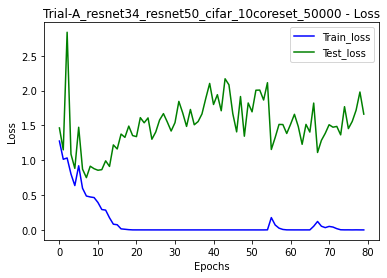

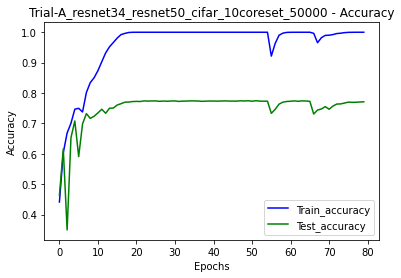

{'Victim': 'resnet50', 'Dataset': 'cifar_10', 'QueryType': 'coreset', 'QuerySize': 50000, 'Queried Output': 'Labels', 'Attacker': 'resnet34', 'Train Loss': 0.0, 'Train Accuracy': 100.0, 'Test Loss': 1.6615, 'Test Accuracy': 77.11}


In [4]:
# get dataset in dataloader
trainloader, testloader, outputs = get_dataloader(config["victim"]["data"])

# query & save test data
querytestloader = query_victim(config["victim"], outputs, testloader, len(testloader.dataset), train=False)

# query train data
querytrainloader = query_victim(config["victim"], outputs, trainloader, config["query_size"], q_type=config["query_type"])

# initialize attacker model
attacker = get_model(config["attacker"], outputs)

# train attacker model
attacker_result = training(attacker, querytrainloader, querytestloader)

# save & visualize model inference
title = f'Trial-A_{config["attacker"]}_{config["victim"]["model_name"]}_{config["victim"]["data"]}{config["query_type"]}_{config["query_size"]}'
percent = save_visualize(attacker, attacker_result,title )
results_dict={"Victim":config["victim"]["model_name"],
                "Dataset":config["victim"]["data"],
                "QueryType": config["query_type"],
                "QuerySize": config["query_size"],
                "Queried Output": 'Labels',
                "Attacker": config["attacker"],
                "Train Loss": percent[0],
                "Train Accuracy": percent[1],
                "Test Loss": percent[2],
                "Test Accuracy": percent[3]}
print(results_dict)

# Parameters

In [ ]:
parameters = {
        "query_size": [10000, 20000, 30000, 40000, 50000],
        "query_type": ['coreset','random'],
        "victim":[{ "data": CIFAR_10, "model_name": RESNET50}],
        "attacker":[RESNET34]
}

# Investigations

In [ ]:
Results = []
# Iterate through Victim Model & Dataset
for victim in parameters["victim"]:
    print('---------------------------------------------------------------------------')
    # get dataset in dataloader
    trainloader, testloader, outputs = getDataset(victim["data"])

    # query test data
    querytestloader = QueryVictim(victim, outputs, testloader, len(testloader.dataset), train=False)

    # Iterate through Attacker Model
    for attacker_type in parameters["attacker"]:
        # Iterate Through Query Type
        for querytype in parameters["query_type"]:
            # Iterate Through Query Size
            for size in parameters["query_size"]:
                print('-----------------------------------------------------------------------------')
                print(f'-----------------------Dataset: {victim["data"]}----------------------------')
                print(f'--------Victim: {victim["model_name"]} Attacker: {attacker_type}------------')
                print(f'---------------Query Type: {querytype} Query Size: {size}-------------------')

                # query train data
                querytrainloader = query_victim(victim, outputs, trainloader, size, q_type=querytype)

                # initialize attacker model
                attacker = get_model(attacker_type, outputs)

                # train attacker model
                attacker_result = training(attacker, querytrainloader, querytestloader)

                # save & visualize model inference
                title = f'A_{attacker_type}_{victim["model_name"]}_{victim["data"]}_{querytype}_{size}'
                percent = SaveVisualize(attacker, attacker_result, title)
                results_dict={"Victim":victim["model_name"],
                                "Dataset":victim["data"],
                                "QueryType": querytype,
                                "QuerySize": size,
                                "Queried Output": 'Labels',
                                "Attacker": attacker_type,
                                "Train Loss": percent[0],
                                "Train Accuracy": percent[1],
                                "Test Loss": percent[2],
                                "Test Accuracy": percent[3]}

                print(results_dict)
                Results.append(results_dict)
                print('-----------------------------------------------------------------------------')

In [ ]:
Results